PCA


In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/fashion_sustainability_cleaned_final.csv"
fashion_data = pd.read_csv(file_path)

# Display basic info and first few rows
fashion_data.info(), fashion_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5013 entries, 0 to 5012
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Brand_Name                  5013 non-null   object 
 1   Country                     5013 non-null   object 
 2   Year                        5013 non-null   int64  
 3   Sustainability_Rating       5013 non-null   object 
 4   Material_Type               5013 non-null   object 
 5   Eco_Friendly_Manufacturing  5013 non-null   object 
 6   Carbon_Footprint_MT         5013 non-null   float64
 7   Water_Usage_Liters          5013 non-null   float64
 8   Waste_Production_KG         5013 non-null   float64
 9   Recycling_Programs          5013 non-null   object 
 10  Product_Lines               5013 non-null   int64  
 11  Average_Price_USD           5013 non-null   float64
 12  Market_Trend                5013 non-null   object 
 13  Certifications              5013 

(None,
    Brand_Name  Country  Year Sustainability_Rating       Material_Type  \
 0  Brand_1127   Brazil  2015                     C                Hemp   
 1    Brand_80    Japan  2023                     B       Vegan Leather   
 2  Brand_3261   Brazil  2014                     B       Bamboo Fabric   
 3  Brand_1737   Brazil  2016                     D  Recycled Polyester   
 4  Brand_4527  Germany  2016                     D      Organic Cotton   
 
   Eco_Friendly_Manufacturing  Carbon_Footprint_MT  Water_Usage_Liters  \
 0                        Yes                85.13          1308839.48   
 1                         No               358.73          1568552.21   
 2                        Yes               330.49          4791168.72   
 3                        Yes               277.11          3023687.50   
 4                        Yes               405.52          3579678.54   
 
    Waste_Production_KG Recycling_Programs  Product_Lines  Average_Price_USD  \
 0             

In [ ]:
from sklearn.preprocessing import StandardScaler

# Selecting only numerical columns relevant for PCA
numerical_cols = ["Year", "Carbon_Footprint_MT", "Water_Usage_Liters",
                  "Waste_Production_KG", "Product_Lines", "Average_Price_USD"]
fashion_data_numerical = fashion_data[numerical_cols]

fashion_data_numerical.head()

,Year,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Product_Lines,Average_Price_USD
0,2015,85.13,1308839.48,60047.04,5,328.81
1,2023,358.73,1568552.21,78799.16,5,240.02
2,2014,330.49,4791168.72,77917.88,7,161.91
3,2016,277.11,3023687.50,10916.38,3,375.71
4,2016,405.52,3579678.54,15449.83,20,112.55


In [ ]:
fashion_data_numerical.to_csv('fashion_data_numerical_pca.csv', index=False)

In [ ]:
# Normalize the data
scaler = StandardScaler()
fashion_data_scaled = scaler.fit_transform(fashion_data_numerical)

# Convert back to DataFrame for better readability
fashion_data_scaled = pd.DataFrame(fashion_data_scaled, columns=numerical_cols)

# Display first few rows of the normalized data
fashion_data_scaled.head()


,Year,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Product_Lines,Average_Price_USD
0,-0.449376,-1.157185,-0.844784,0.345549,-0.951567,0.502379
1,1.386584,0.759548,-0.663207,0.998102,-0.951567,-0.142291
2,-0.678871,0.561710,1.589865,0.967434,-0.601203,-0.709418
3,-0.219881,0.187751,0.354142,-1.364145,-1.301931,0.842902
4,-0.219881,1.087340,0.742859,-1.206385,1.676162,-1.067802


In [ ]:
import numpy as np

In [ ]:
from numpy import sum as np_sum
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Perform PCA with 2 components
pca_2d = PCA(n_components=2)
df_pca_2d = pca_2d.fit_transform(fashion_data_scaled)

# Perform PCA with 3 components
pca_3d = PCA(n_components=3)
df_pca_3d = pca_3d.fit_transform(fashion_data_scaled)

# Explained variance ratio for 2D and 3D
explained_variance_2d = np_sum(pca_2d.explained_variance_ratio_) * 100
explained_variance_3d = np_sum(pca_3d.explained_variance_ratio_) * 100

# Perform PCA with 2 components
pca_2d = PCA(n_components=2)
df_pca_2d = pca_2d.fit_transform(fashion_data_scaled)

# Perform PCA with 3 components
pca_3d = PCA(n_components=3)
df_pca_3d = pca_3d.fit_transform(fashion_data_scaled)

# Explained variance ratio for 2D and 3D
explained_variance_2d = np.sum(pca_2d.explained_variance_ratio_) * 100
explained_variance_3d = np.sum(pca_3d.explained_variance_ratio_) * 100


In [ ]:
import matplotlib.pyplot as plt

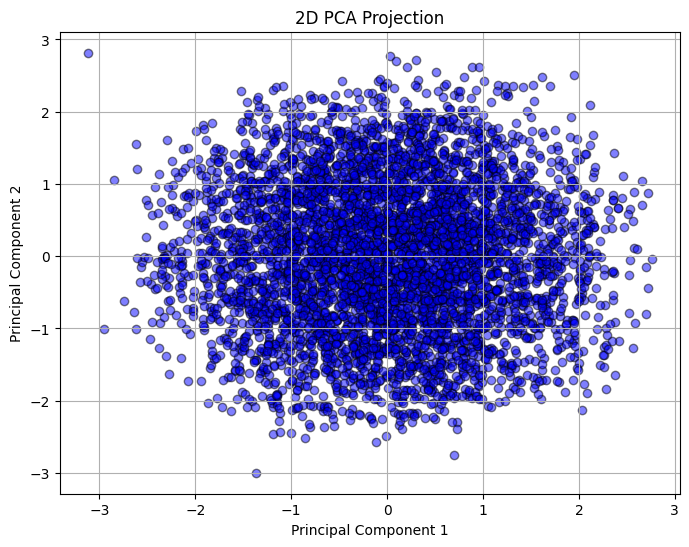

In [ ]:
# 2D Visualization
plt.figure(figsize=(8, 6))
plt.scatter(df_pca_2d[:, 0], df_pca_2d[:, 1], alpha=0.5, c='blue', edgecolors='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Projection")
plt.grid(True)
plt.show()


In [ ]:
explained_variance_2d

34.83760722133141

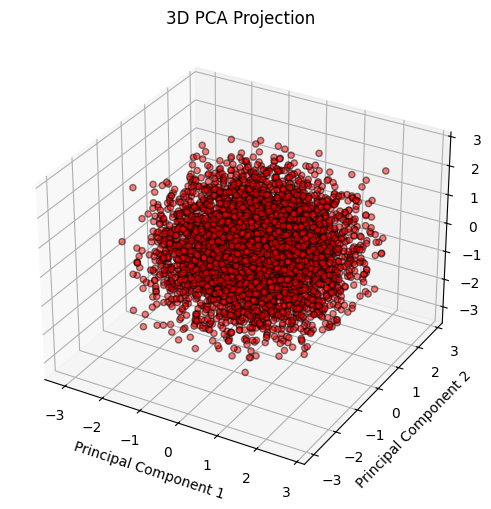

In [ ]:

# 3D Visualization
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca_3d[:, 0], df_pca_3d[:, 1], df_pca_3d[:, 2], alpha=0.5, c='red', edgecolors='k')
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D PCA Projection")
plt.show()

In [ ]:

# Display explained variance percentages
explained_variance_3d


51.91549254875818

In [ ]:
# Perform PCA with all components to analyze cumulative explained variance
pca_full = PCA()
pca_full.fit(fashion_data_scaled)

# Compute cumulative explained variance
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Determine number of components to retain at least 95% variance
num_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

# Extract top three eigenvalues
top_eigenvalues = pca_full.explained_variance_[:3]

# Display results
num_components_95, top_eigenvalues


(6, array([1.05041515, 1.04025834, 1.02487756]))

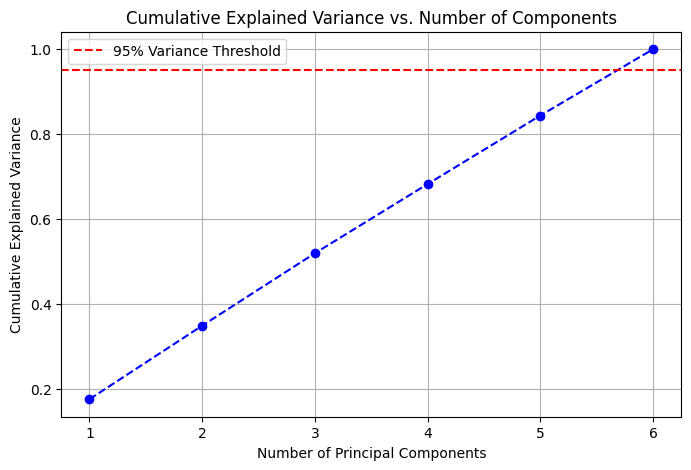

In [ ]:
# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance vs. Number of Components")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
num_components_95, top_eigenvalues

(6, array([1.05041515, 1.04025834, 1.02487756]))

In [ ]:


import pandas as pd


# Create a DataFrame from the PCA results
pca_6d_df = pd.DataFrame(data=df_pca_6d, columns=[f'PC{i+1}' for i in range(6)])

# Display the DataFrame
print(pca_6d_df)

# Save the DataFrame to a CSV file (optional)
pca_6d_df.to_csv('pca_6d_results.csv', index=False)


           PC1       PC2       PC3       PC4       PC5       PC6
0    -0.786710 -1.466060 -0.471324 -0.426777  0.233701  0.552087
1     0.346123 -0.849834  1.008747  0.461616  1.493028 -0.747995
2    -0.998061  0.265468  0.129070  1.142949 -0.747262 -1.468575
3     0.408484 -0.539658 -0.894533 -1.360013 -0.362504 -1.111795
4     1.342416  1.839155  0.305110  0.426392 -1.311527  0.089481
...        ...       ...       ...       ...       ...       ...
5008 -0.340229  0.006459 -1.102821  0.955181  1.160374 -0.403920
5009 -1.767302  1.305415 -0.597592  1.280522 -0.722829  0.215578
5010 -1.495530 -0.002751 -0.647853  0.915660 -0.450740 -0.974177
5011  0.303593  0.503922  0.027934 -1.703586 -0.578787 -0.259984
5012 -0.385465  0.159255  0.426207 -1.486560 -0.451886 -1.203722

[5013 rows x 6 columns]


In [ ]:
loadings = pca_6d.components_.T * np.sqrt(pca_6d.explained_variance_)
loading_matrix = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(6)], index=numerical_cols)
print("\nLoadings Matrix:\n", loading_matrix)

In [ ]:
# using PC1 and PC2:
def biplot(score,coeff,ylabels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = 'blue', alpha=0.5, edgecolors='k')
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if ylabels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, ylabels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

biplot(df_pca_6d[:,0:2],np.transpose(pca_6d.components_[0:2, :]), list(fashion_data_numerical.columns))
plt.show()



Loadings Matrix:
                           PC1       PC2       PC3       PC4       PC5  \
Year                 0.146855  0.162355  0.700576 -0.362650  0.562258   
Carbon_Footprint_MT  0.656812  0.197793 -0.168887  0.462892  0.173728   
Water_Usage_Liters  -0.482731  0.585393  0.058204 -0.108044 -0.300861   
Waste_Production_KG -0.572793 -0.095081  0.114021  0.665573  0.455053   
Product_Lines        0.122892  0.776061 -0.003539  0.190869  0.014849   
Average_Price_USD   -0.145679  0.144157 -0.699390 -0.376492  0.570333   

                          PC6  
Year                -0.117554  
Carbon_Footprint_MT -0.506658  
Water_Usage_Liters  -0.564718  
Waste_Production_KG  0.002480  
Product_Lines        0.588356  
Average_Price_USD   -0.044975  


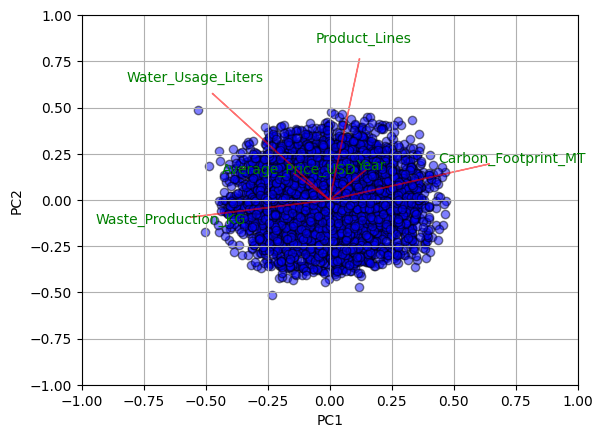

In [ ]:


# Perform PCA to reduce to 3D
pca_3d = PCA(n_components=3)
df_pca_3d = pca_3d.fit_transform(fashion_data_scaled)

# Convert to DataFrame
df_pca_3d = pd.DataFrame(df_pca_3d, columns=['PC1', 'PC2', 'PC3'])

# Compute variance retained in 3D
variance_3d = np.sum(pca_3d.explained_variance_ratio_) * 100

# Print Results
print("First 5 rows of Normalized Data:")
print(fashion_data_scaled.head())

print("\nFirst 5 rows of PCA Reduced Data (3D):")
print(df_pca_3d.head())

print(f"\nVariance Retained in 3D PCA: {variance_3d:.2f}%")


First 5 rows of Normalized Data:
       Year  Carbon_Footprint_MT  Water_Usage_Liters  Waste_Production_KG  \
0 -0.449376            -1.157185           -0.844784             0.345549   
1  1.386584             0.759548           -0.663207             0.998102   
2 -0.678871             0.561710            1.589865             0.967434   
3 -0.219881             0.187751            0.354142            -1.364145   
4 -0.219881             1.087340            0.742859            -1.206385   

   Product_Lines  Average_Price_USD  
0      -0.951567           0.502379  
1      -0.951567          -0.142291  
2      -0.601203          -0.709418  
3      -1.301931           0.842902  
4       1.676162          -1.067802  

First 5 rows of PCA Reduced Data (3D):
        PC1       PC2       PC3
0 -0.786710 -1.466060 -0.471324
1  0.346123 -0.849834  1.008747
2 -0.998061  0.265468  0.129070
3  0.408484 -0.539658 -0.894533
4  1.342416  1.839155  0.305110

Variance Retained in 3D PCA: 51.92%
